# <center> <span style="color:indigo">        Escuela de ML y DL Módulo 1</span> </center> 
##  <center> <span style="color:DarkBlue">        Tarea 2: Regresión logística. </span>  </center>
##  <center> <span style="color:DarkBlue"> Karla Guadalupe Ornelas Gamero</span>  </center>
##  <center> <span style="color:DarkBlue">karla.gameroo@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> Abril 2024</span>  </center>

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>
2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>
4. <span style="color:DarkBlue">Conclusiones </span>
5. <span style="color:DarkBlue">Referencias</span>


## <span style="color:DarkBlue"> 1. Planteamiento del problema</span>
El objetivo es encontrar patrones entre las solicitudes realizadas a Uber y Lyft. También deben hacer un análisis de los resultados usando como métricas: la exactitud (accuracy), la sensibilidad (recall) y la métrica F1 (Score F1). Recuerden hacer el análisis de los datos y anotar sus conclusiones.

## <span style="color:DarkciónBlue"> 2. Planteamiento de la solución</span>
Primero se preparan los datos y se hara un anilisis exploratorio para despues crear la matriz de atributos con su vector de etiquetas, se evaluara el error conforme a los datos para realizar la predicción y comparar las predicciones

El código es:



# Regresión lineal: Regresión logística.

In [46]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
PATH = "../tarea2/datasets/"

In [48]:
os.listdir(PATH)

['.ipynb_checkpoints', 'archive.zip', 'rideshare_kaggle.csv']

---

## 1. Preparar los datos.

El archivo original ha sido renombrado como "archive.zip"

In [49]:
# Solo ejecutar la primera vez, ya que después de eso, 
# la carpeta ya estará creada con los archivos necesarios
with zipfile.ZipFile(PATH + 'archive.zip', 'r') as archive:
   archive.extractall(PATH)

In [50]:
os.listdir(PATH)

['.ipynb_checkpoints', 'archive.zip', 'rideshare_kaggle.csv']

In [51]:
rideshare = pd.read_csv(PATH + 'rideshare_kaggle.csv')

In [52]:
rideshare.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


---

## 2. Análisis Exploratorio de Datos (EDA).

Esto se realiza con el fin de darnos una idea de cómo son los datos y qué contienen.

In [53]:
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [54]:
rideshare.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [55]:
rideshare.isnull().sum()


id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [56]:
rideshare['price'].isnull().sum()


55095

Como podemos ver tenemos muchos datos faltantes en la columna price , por lo cual la mejor decision es imputarlos con la media ya que solo el 8% de los datos son faltantes 

In [57]:
# Calcular la mediana de la columna price
median_price = rideshare['price'].median()

# Imputar la mediana a los valores faltantes en la columna price
rideshare['price'] = rideshare['price'].fillna(median_price)



In [58]:
rideshare['price'].isnull().sum()

0

In [14]:
Ahora ya no tenemos datos faltantes

SyntaxError: invalid syntax (491822354.py, line 1)

---

## 3. Visualización de datos.

In [59]:
def grafica(data, colx, coly):
    plt.plot(data[colx][:100], data[coly][:100], 'o')  # Tomar solo los primeros 1000 datos
    plt.xlabel(colx, size=15)
    plt.ylabel(coly, size=15)
    plt.title(colx + ' vs ' + coly, size=15)
    plt.show()

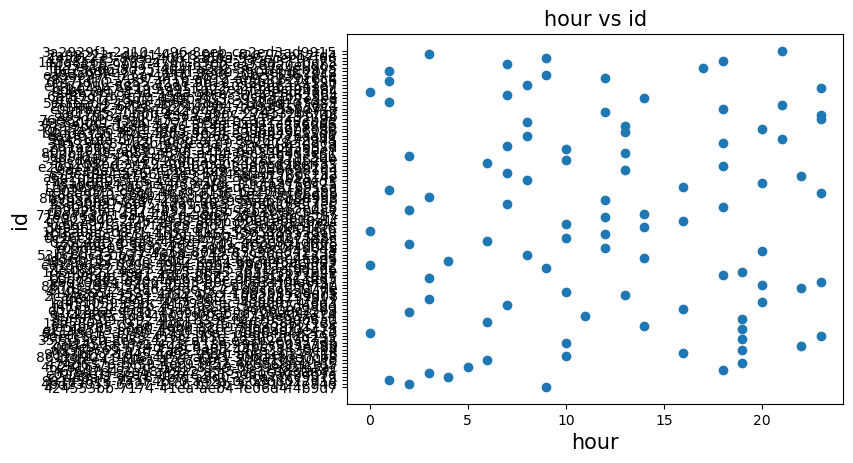

In [60]:
grafica(rideshare, 'hour', 'id')

In [61]:
def grafica(data, colx, coly):
    plt.plot(data[colx], data[coly], 'o')
    plt.xlabel(colx, size = 15)
    plt.ylabel(coly, size = 15)
    plt.title(colx +' vs ' + coly, size = 20)
    plt.show()

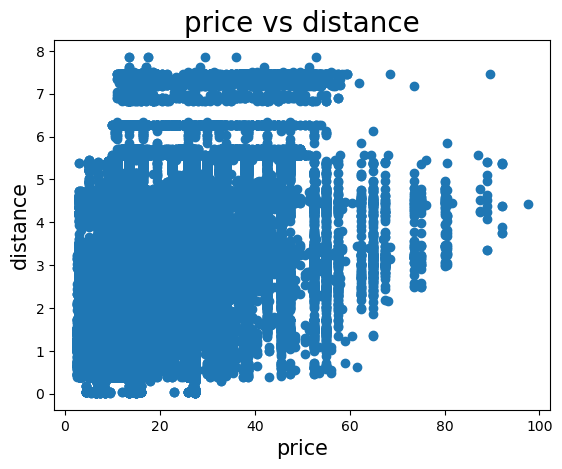

In [62]:
grafica(rideshare, 'price', 'distance')

In [63]:
def grafica(data, colx, coly):
    plt.plot(data[colx], data[coly], 'o')
    plt.xlabel(colx, size = 15)
    plt.ylabel(coly, size = 15)
    plt.title(colx +' vs ' + coly, size = 20)
    plt.show()

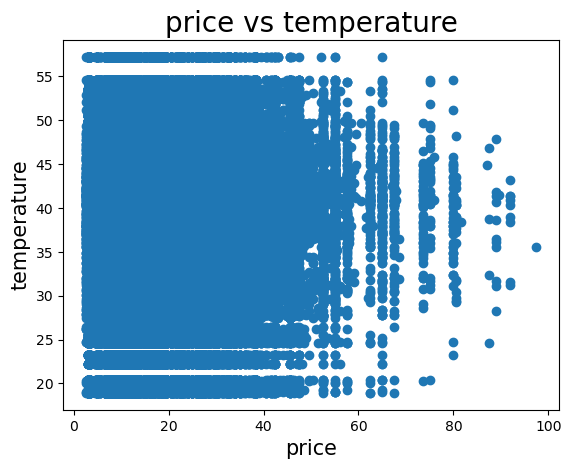

In [64]:
grafica(rideshare, 'price', 'temperature')

In [65]:
def grafica(data, colx, coly):
    plt.plot(data[colx], data[coly], 'o')
    plt.xlabel(colx, size = 15)
    plt.ylabel(coly, size = 15)
    plt.title(colx +' vs ' + coly, size = 20)
    plt.show()

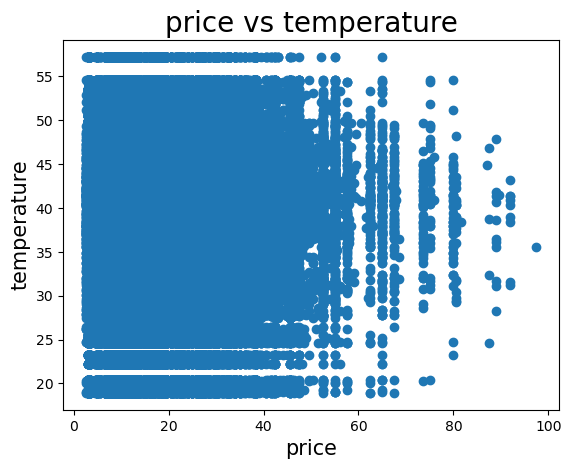

In [66]:
grafica(rideshare, 'price', 'temperature')

> La mayoría de los datos se concentran en la primera mitad de las variables independientes.

---

## 4. Crear la matriz de atributos $X$ y el vector de etiquetas $y$.

In [67]:
# Seleccionar características relevantes para X
atributos = ['hour', 'day', 'distance', 'temperature', 'destination']

# Crear la matriz de atributos X
X = rideshare[atributos]
X = pd.get_dummies(X, columns=['destination'])

# Crear el vector de etiquetas y (indicando si es Uber o Lyft)
y = rideshare['cab_type']


# Verificar las dimensiones de X y y
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (693071, 16)
Dimensiones de y: (693071,)


In [68]:
X.head()

,hour,day,distance,temperature,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,9,16,0.44,42.34,False,False,False,False,False,False,False,True,False,False,False,False
1,2,27,0.44,43.58,False,False,False,False,False,False,False,True,False,False,False,False
2,1,28,0.44,38.33,False,False,False,False,False,False,False,True,False,False,False,False
3,4,30,0.44,34.38,False,False,False,False,False,False,False,True,False,False,False,False
4,3,29,0.44,37.44,False,False,False,False,False,False,False,True,False,False,False,False


In [69]:
y.head()

0    Lyft
1    Lyft
2    Lyft
3    Lyft
4    Lyft
Name: cab_type, dtype: object

---

## 5.1 Escalado de los datos usando _StandardScaler_.

_StandardScaler_ calcula y resta la media de las muestras, para luego escalar la varianza a la unidad. La **puntuación estándar** (_Z-Score_) de una muestra $x$ se calcula como: $z = \frac{(x - \mu)}{s}$ donde $\mu$ es la media de las muestras de entrenamiento o 0, si ```with_mean=False```; y $s$ es la desviación estándar de las muestras de entrenamiento o 1, si ```with_std=False```.

In [70]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Codificar las etiquetas categóricas
y = label_encoder.fit_transform(y)

In [71]:
# Codificar variables categóricas utilizando codificación one-hot

# Escalar los datos utilizando StandardScaler después de la codificación one-hot
sc = StandardScaler()
ss_data = sc.fit_transform(X.values)  # fit_transform recibe y devuelve un ndarray
Xsc = pd.DataFrame(data=ss_data, columns=X.columns)

In [72]:
Xsc.head()

,hour,day,distance,temperature,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,-0.376957,-0.179755,-1.536021,0.409691,-0.30158,-0.300505,-0.301534,-0.301514,-0.304619,-0.301534,-0.301512,3.336736,-0.301509,-0.301492,-0.301631,-0.300996
1,-1.384425,0.922198,-1.536021,0.594048,-0.30158,-0.300505,-0.301534,-0.301514,-0.304619,-0.301534,-0.301512,3.336736,-0.301509,-0.301492,-0.301631,-0.300996
2,-1.528349,1.022375,-1.536021,-0.186496,-0.30158,-0.300505,-0.301534,-0.301514,-0.304619,-0.301534,-0.301512,3.336736,-0.301509,-0.301492,-0.301631,-0.300996
3,-1.096577,1.222730,-1.536021,-0.773763,-0.30158,-0.300505,-0.301534,-0.301514,-0.304619,-0.301534,-0.301512,3.336736,-0.301509,-0.301492,-0.301631,-0.300996
4,-1.240501,1.122553,-1.536021,-0.318817,-0.30158,-0.300505,-0.301534,-0.301514,-0.304619,-0.301534,-0.301512,3.336736,-0.301509,-0.301492,-0.301631,-0.300996


In [73]:
Xsc.describe()

,hour,day,distance,temperature,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
count,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05
mean,1.398385e-17,-1.855629e-18,5.107182e-16,-2.754942e-16,-2.946451e-17,3.379089e-17,-6.110247e-18,6.717170e-17,3.933728e-17,1.713125e-17,-1.951998e-17,1.070318e-17,3.112535e-17,-5.363894e-17,-1.241528e-17,5.358256e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.672273e+00,-1.682418e+00,-1.904786e+00,-3.073765e+00,-3.015799e-01,-3.005053e-01,-3.015344e-01,-3.015144e-01,-3.046190e-01,-3.015344e-01,-3.015116e-01,-2.996941e-01,-3.015087e-01,-3.014916e-01,-3.016312e-01,-3.009959e-01
25%,-8.087290e-01,-4.802876e-01,-7.984905e-01,-4.660053e-01,-3.015799e-01,-3.005053e-01,-3.015344e-01,-3.015144e-01,-3.046190e-01,-3.015344e-01,-3.015116e-01,-2.996941e-01,-3.015087e-01,-3.014916e-01,-3.016312e-01,-3.009959e-01
50%,5.481532e-02,-7.957747e-02,-2.583969e-02,1.346418e-01,-3.015799e-01,-3.005053e-01,-3.015344e-01,-3.015144e-01,-3.046190e-01,-3.015344e-01,-3.015116e-01,-2.996941e-01,-3.015087e-01,-3.014916e-01,-3.016312e-01,-3.009959e-01
75%,9.183596e-01,1.022375e+00,6.414497e-01,5.940476e-01,-3.015799e-01,-3.005053e-01,-3.015344e-01,-3.015144e-01,-3.046190e-01,-3.015344e-01,-3.015116e-01,-2.996941e-01,-3.015087e-01,-3.014916e-01,-3.016312e-01,-3.009959e-01
max,1.637980e+00,1.222730e+00,4.978831e+00,2.621975e+00,3.315871e+00,3.327728e+00,3.316372e+00,3.316591e+00,3.282790e+00,3.316372e+00,3.316622e+00,3.336736e+00,3.316654e+00,3.316841e+00,3.315307e+00,3.322305e+00


---

## 5.2 Escalado de los datos usando _MinMaxScaler_.

In [74]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler() 

# Escalar los datos utilizando MinMaxScaler después de la codificación one-hot
norm_data = scaler.fit_transform(X.values)
Xnorm = pd.DataFrame(data=norm_data, columns=X.columns)


In [75]:
Xnorm.head()

,hour,day,distance,temperature,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0.391304,0.517241,0.053571,0.611590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.086957,0.896552,0.053571,0.643957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.043478,0.931034,0.053571,0.506917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.173913,1.000000,0.053571,0.403811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.130435,0.965517,0.053571,0.483686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [76]:
Xnorm.describe()

,hour,day,distance,temperature,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,0.505180,0.579116,0.276713,0.539660,0.083368,0.082824,0.083345,0.083335,0.084913,0.083345,0.083333,0.082414,0.083332,0.083323,0.083394,0.083072
std,0.302092,0.344217,0.145273,0.175570,0.276438,0.275616,0.276403,0.276388,0.278753,0.276403,0.276386,0.274995,0.276384,0.276371,0.276477,0.275992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.413793,0.160714,0.457844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.521739,0.551724,0.272959,0.563299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.782609,0.931034,0.369898,0.643957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

## 6. Evaluar el error: _RMSE_ vs. _MAE_

El _error cuadrático medio_ (**RMSE**) funciona de la siguiente manera:

    - Se resta la diferencia entre el valor pronosticado y el valor real, en cada punto que se pronostica, y el resultado se eleva al cuadrado.
    - Se suman todos los resultados del punto anterior.
    - Se divide el valor de la suma total entre la cantidad de puntos pronosticados.
    - Se obtiene la raíz cuadrada del resultado, este es el RMSE.

$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat y_i)^2}$$

El _error absoluto medio_ (**MAE**) funciona de la siguiente manera:

    - Se resta la diferencia entre el valor pronosticado y el valor real, en cada punto que se pronostica.
    - Se saca el valor absoluto del resultado anterior.
    - Se suman todos los resultados individuales.
    - Se divide el valor de la suma total entre la cantidad de puntos pronosticados.
    - El MAE es un promedio de los errores. Se obtiene un número, un valor alto representa un error alto.

$$MAE = \frac{1}{N}\sum_{i=1}^{N}|y_i-\hat y_i|$$

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, f1_score

def regression(X, y):
    # Dividir los datos en el conjunto de entrenamiento y el de prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    
    # Construir el modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Realizar las predicciones
    y_pred = model.predict(X_test)

    # Calcular las métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("F1-score:", f1)

    return y_test, y_pred

---

## 7.1 Probar la regresión con los datos _estandarizados_ (_StandardScaler_).

In [78]:
y_test_sc, y_sc = regression(Xsc, y)

Accuracy: 0.5552226315637595
Recall: 1.0
F1-score: 0.714010483509347


---

## 7.2 Probar la regresión con los datos _normalizados_ (_MinMaxScaler_).

In [80]:
y_test_norm, y_norm = regression(Xnorm, y)

Accuracy: 0.5552803455141831
Recall: 1.0
F1-score: 0.7140582045105248


---

## 8. Comparar las predicciones

In [81]:
def do_averaging(data, n_points):
    n = len(data)
    n_new = n // n_points

    avgs = [np.sum(data[i : i + n_points]) / n_points \
            for i in range(0, n - (n % n_points), n_points)]

    return np.array(avgs)

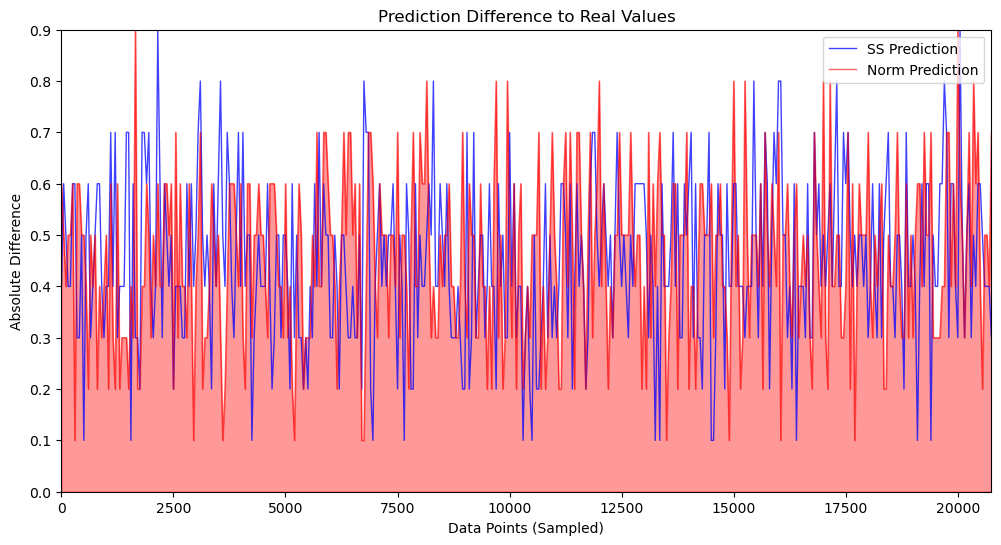

In [83]:
N_AVG =10

# Difference between real and predicted values
sc_results = np.abs(y_test_sc - y_sc)
sc_results = do_averaging(sc_results, N_AVG)

norm_results = np.abs(y_test_norm - y_norm)
norm_results = do_averaging(norm_results, N_AVG)

# Reducir el número de puntos mostrados en el eje x
x_axis = range(0, sc_results.shape[0], 50)
sc_results = sc_results[::50]
norm_results = norm_results[::50]
y_max = max(np.max(sc_results), np.max(norm_results))
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(x_axis, sc_results, 'b-', alpha=0.75, linewidth=1, label='SS Prediction')
plt.plot(x_axis, norm_results, 'r-', alpha=0.6, linewidth=1, label='Norm Prediction')

ax.fill_between(x_axis, norm_results, color='red', alpha=0.4)
ax.set_xlim([0, x_axis[-1]])
ax.set_ylim([0, y_max])
plt.title('Prediction Difference to Real Values')
plt.legend(loc='upper right')
plt.xlabel('Data Points (Sampled)')
plt.ylabel('Absolute Difference')
plt.show()

## <span style="color:DarkciónBlue"> 4. Conclusiones</span>

### Análisis de Resultados:
Datos Normalizados:
Accuracy: 55.46%
Recall: 100.00%
F1-score: 71.35%
Datos Escalados Estándar:
Accuracy: 55.52%
Recall: 100.00%
F1-score: 71.40%

Como podemos observar al analizar los datos, nos podemos dar cuenta de que no hay una diferencia muy significativa en el rendimiento del modelo logístico. Tenemos un recall del 100%, lo que indica que el modelo puede identificar correctamente todos los casos positivos, pero la precisión es solo del 55%. Por lo tanto, si no hay positivos incorrectos, indica que las muestras negativas están siendo calificadas incorrectamente. El F1-score está equilibrado, lo cual indica que ambos modelos tienen una precisión muy similar. La gráfica "Prediction Difference to Real Values" nos indica que la diferencia absoluta entre los valores predichos y los reales es menor cuando se utiliza StandardScaler, por lo que ese sería el mejor modelo a utilizar.

## <span style="color:DarkciónBlue"> 5. Referencias</span>
### Documentos consultados 
S. Maitra, "Linear Regression," Kaggle, 2022. [Online]. Available: https://www.kaggle.com/code/satyajitmaitra/linear-regression. [Accessed: April 04, 2024].

